# Generate synthetic training data

## What is this notebook for?

The purpose of this notebook is to compensate for the small number of authentic data samples that we have access to. The handwriting and story analysis model needs more training data to gain more accuracy. This notebook allows the data science team to generate synthetic training data in the absence of authentic samples.

There are only 200 authentic samples. Ask Story Squad stakeholders to email you the zip file if you can't find it.

You should note that real data will represent more variation than you will see in the authentic sample data set because the sample data was all collected in the same way, written on the same kind of paper, photographed on the same device, etc.

Accordingly, many of the synthetic samples we will generate with this notebook will show more variety than the current data set of authentic data. However, you should continue to use the genuine samples as a guidepost.

### Example sample generation

First, we will show a single example, generated based on instructions at this tutorial: https://www.haptik.ai/tech/putting-text-on-image-using-python/

You will probably want to play around with this sample to better understand a sample image's parameters before you later go on to tweak the sample generating function (which randomizes across a large space of possible parameters).

## This Python script takes a string of text and renders 1 image using a handwriting font

The primary Python library we are working with, for generating images, is called Pillow, which is itself a fork of PIL.

In [10]:
# Import required classes
from PIL import Image, ImageDraw, ImageFont
import textwrap
import random

In [11]:
# Based on https://www.pythonforbeginners.com/gui/how-to-use-pillow
#  and
# https://code-maven.com/create-images-with-python-pil-pillow

# Draw a simple image with one color

c=150
 
img = Image.new('RGB', (600, 300), color =(c,c,c))

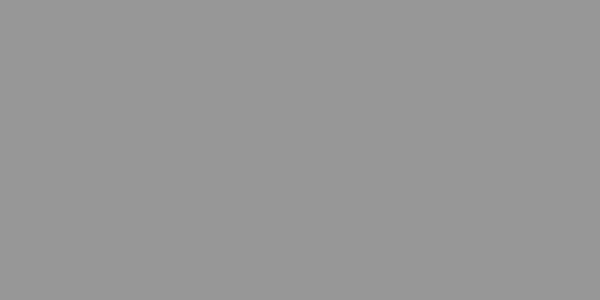

In [12]:
img

In [13]:
# Based on https://www.haptik.ai/tech/putting-text-on-image-using-python/
 
# Initialise the drawing context with
# the image object as background
 
draw = ImageDraw.Draw(img)

# Create font object with the font file and specify
# desired size

font = ImageFont.truetype('./fonts/kimberly-geswein_pizza-is-my-favorite/PizzaismyFAVORITE.ttf', size=45)
 
# Starting position of the message
 
(x, y) = (50, 50)

# String and color of message

message = 'Happy Birthday!!'
color = 'rgb(0, 0, 0)' # black color
 
# draw the message on the background
 
draw.text((x, y), message, fill=color, font=font)

# Add lines to mimic lines on paper

draw.line((0,50, 600,50), fill='black')
draw.line((0,140, 600,140), fill='black')

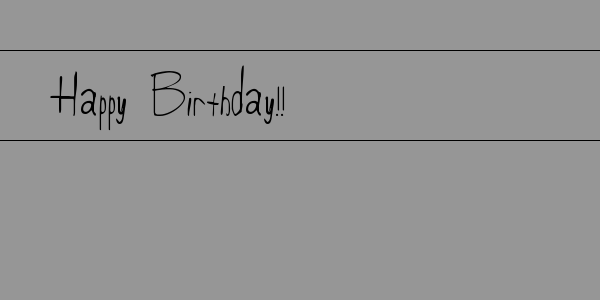

In [14]:
img

# Turning the above concept into a function that can create arbitrarily many samples

In [15]:
# Handwriting fonts sourced from 
# https://www.1001fonts.com/children+handwriting-fonts.html?page=1
#    and
# https://www.fontspace.com/category/children,handwriting   

fonts = ['./fonts/kimberly-geswein_pizza-is-my-favorite/PizzaismyFAVORITE.ttf',
        './fonts/AckiPreschool.ttf',
        './fonts/BPchildLefty.ttf',
        './fonts/doves.ttf',
        './fonts/Schoolbell.ttf',
        './fonts/tommys.ttf',
        './fonts/messy-handwritten/MessyHandwritten-Regular.ttf',
        './fonts/jackblack/Jackblackdemo.ttf',
        './fonts/CakorAyamFont/CakorAyam.ttf',
        './fonts/kimberly-geswein_kate-the-great/KatetheGreat.ttf',
        './fonts/DamiasFont/Damias_Hand.ttf',
        './fonts/children/Children.ttf',
        './fonts/KindergardenFont/Kindergarden.ttf',
        './fonts/5yearsoldfont/5yearsoldfont.ttf',
        './fonts/coming-soon/ComingSoon.ttf',
        './fonts/Kbmisosoup-GnOa.ttf',
        './fonts/Baybay-2Gqe.ttf',
        './fonts/GraniteletterRegular-ERXj.ttf',
        './fonts/MilanaRoseRegular-XpJG.ttf',
        './fonts/RunawayLies-ngZP.ttf',
        './fonts/Skinny-VnD0.ttf',
        './fonts/MyFirstFontEver-lYVy.ttf',
        './fonts/Kbwhenpigsfly-5x1z.ttf',
        './fonts/MtfGavin-7XAD.ttf',
        './fonts/MyLeftFont-71vR.ttf',
        './fonts/Kbloveitdown-ragO.ttf',
        './fonts/Kbmisosoup-GnOa.ttf',
        './fonts/Tonisianwilliams-3xa6.ttf',
        './fonts/SandboxMelodrama-8ye0.ttf',
        './fonts/Kbpinklipgloss-jaEv.ttf',
        './fonts/Kbanditslipsmymind-YGzj.ttf',
        './fonts/Rayando-xj18.ttf',
        './fonts/Kbkinderwrite-D3OE.ttf',
        './fonts/ChildsPlay-0aG9.ttf',
        './fonts/Iamthecrayonmaster-MyqB.ttf',
        './fonts/Kidsfirstprintfont-6jxx.ttf',
        './fonts/Kbgobbleday-eyZe.ttf',
        './fonts/syifana-font/Syifana-K70Ky.ttf',
        './fonts/pencilpete-font/PencilpeteFont-2eE3.ttf',
        './fonts/krayola-font/KrayolaV1Regular-1Go9e.ttf',
        './fonts/hey-kiddo-font/Heykiddodemo-8Mao0.ttf',
        './fonts/homework-font/HomeworkNormal-yYd2.ttf',
        './fonts/you-are-a-toy-font/YouAreAToy-8KKn.ttf',
        './fonts/itty-bitty-notebook-font/IttyBittyNotebook-2X7K.ttf',
        './fonts/mikies-christmas-list-font/MikiesChristmasList-JZJM.ttf',
        './fonts/sensible-schooling-font/SensibleSchooling-oYjA.ttf',
        './fonts/dk-crayonista-font/Dkcrayonista-rmVO.ttf',
        './fonts/vlaanderen-font/Vlaanderen-vLqM.ttf',
        './fonts/first-grader-font/FirstGrader-jjMj.ttf',
        './fonts/six-yr-old-rushed-font/SixYrOldRushed-5Bjv.ttf',
        './fonts/six-yr-old-rushed-font/LittleSistersWriting-z7jL.ttf',
        './fonts/crappy-dan-font/Crappydan-E4Kr.ttf',
        './fonts/domo-is-my-favorite-font/KgDomoIsMyFavorite-lpW0.ttf',
        './fonts/artooh-font/Artooh-qm72.ttf']

In [24]:
# Possible shades of "paper"
# (More or less, all the lighter colors on this list here:
# https://en.wikipedia.org/wiki/X11_color_names)

bg_colors = ['#D3D3D3', '#BEBEBE', '#FFFF00', '#FFFFFF',
             '#F0F8FF', '#FAEBD7', '#F0FFFF', '#F5F5DC',
             '#FFE4C4', '#F7E7CE', '#FFF8DC', '#FEFEFA',
             '#F8F8FF', '#DCDCDC', '#F0FFF0', '#FFFFF0', 
             '#F0E68C', '#E6E6FA', '#FFF0F5', '#FFFACD',
             '#E0FFFF', '#FAFAD2', '#B0C4DE', '#FFFFE0',
             '#FAF0E6', '#F5FFFA', '#FFE4E1', '#FFE4B5', 
             '#FFDEAD', '#F0EAD6', '#EEE8AA', '#FFEFD5', 
             '#FFDAB9', '#B0E0E6', '#FFF5EE', '#FFFAFA', 
             '#C0C0C0', '#D8BFD8', '#F5DEB3', '#F3E5AB', 
             '#EDEAE0']

## Bugs that still need to be fixed in the below function:

### (run "create_synth_samples()" code cell to generate examples you can look at)

- Writing sometimes runs off the right or bottom of the page
- Line spacing matches height of font much less frequently than it should
    
## Ideas to experiment with/iterate on in future versions to better mimic real data:

- Handwriting variation; no 2 letters look exactly the same. Two ideas for this:
	- Some fonts have more than one symbol per character. This can be activated by passing in "features='aalt'" as an argument. Libraqm is the package you need to use this, and it is compatible with Pillow (but not PIL). Supposedly it's built in to versions of Pillow starting with 5.0; you should figure out how to use that library.
	- Refactor the function so that it uses multiple fonts per string (variable name 'story'). You'll probably want a for loop for this.


- Lighting variation across pages, e.g. dark in one corner with a gradient of light across the rest of the page
- Eraser marks that make the background of one word/phrase/character much darker than the overall shade of the sheet of paper
- Variation in darkness of "pencil" (text color) across the page
- Variation in thickness of text (e.g. as if a pencil is getting blunter as the child writes)
- The "starting point" (i.e. where on the page a person begins writing) will not be uniform in real data
- Line spacing, for example, writing that skips every other line (you can see examples of this in authentic samples)
- Tilted pages (rotate image a few degrees left or right)
- Skewed pages. It will help to look at the authentic samples to see what I mean by this. In many samples, the camera is not perfectly parallel to the page, so the left edge of the paper is longer than the right edge or vice versa.
- (Once you have fixed line spacing issue) Use "offset" variable to randomize how close to the "lined paper" the words are. Offset is currently set to zero.
    - The intuition here is that some people write sentences such that the bottom of the text perfectly brushes up with the line below, others write sentences more vertically centered between the above and below lines, etc.

## Separate from the authenticity of the synthetic images from a straightforward 'appearance' perspective is the matter of how well the text samples themselves match the writing abilities of 3rd-5th graders 

If you can't find an open-source repository of short stories written by children in that age group (probably the best option), I have an idea for a source of text that cleaves closer to the general idea than what is currently being used.

### What is the current source of text?

I modified a web scraper, which you can find here: https://github.com/EEdwardsA/data-mining-script-for-ao3. Clone this repo and run it on your own machine to generate txt files for the below function to use. If a data science team member in Labs32 would like me to explain this code to them, they should feel free to reach me via my GitHub profile's contact info.

Since the stories for Story Squad will all be technically "fanfiction", it made sense to scrape stories from fanfiction archives (in the absence of stories written by children).

None of these stories have the age or grade level of the author attached, and indeed, most of these stories were probably written by adults, or at least minors over the age of 13, since that is the minimum account creation age. However, I attempted to approximate more childlike characteristics by 
- Sorting the stories by "kudos" (a measure of popularity) and scraping only the least popular stories (the last ~20 pages of results)
	- Downside: popularity is also a proxy for recency, so some well-written stories also got scraped
- Restricting stories to 100-700 words in length
- Restricting stories to "General Audiences" maturity level only
- Restricting stories to "No Archive Warnings Apply"
- Restricting stories to "Gen" i.e. no content focused on romantic relationships

There are large selection effects for which fanfiction archive a writer publishes their stories in, several of which correlate with age. Archive of Our Own, the current source of scraped data, probably has the overall oldest/most mature userbase. Alternate archives you could scrape, which have younger and more amateur user bases, are fanfiction.net and Wattpad.

Here is a web scraper script for fanfiction.net that you can modify: https://github.com/smilli/fanfiction

I have not found a web scraper for Wattpad.

### One extra thing you or future DS teams after you will need to consider

When images of handwritten stories are submitted via Story Squad, some of them will not fit on a single image; some will be spread across multiple images/pages. Front-end processing should vertically concatenate the images of any split stories into one single image if they are going to be fed to a model that is trained on synthetic data that has a 1:1 story to image relationship.

In [25]:
def create_synth_samples(n):
    """A function that automatically generates n handwritten story samples"""
    for i in range(n):
        
        # Randomly choose a story from scraped stories
        # Stories are scraped using this script: 
        # https://github.com/EEdwardsA/data-mining-script-for-ao3
        
        s = random.randint(0, 200) # Change 2nd number to number of
                                   # stories you scraped minus 1
        story = open(f'./stories/story{s}.txt')
        
        # Turn story into string object
        
        text = story.read()
        
        # Randomly assign width of image from range of pixels. 
        # Font size of image is a function of width and width_scaler
        # Height of image is a function of font size and length of story
        
        width = random.randint(500, 900)
        width_scaler = random.randint(16,20)
        font_size = int((width)/width_scaler)
        height = int((len(text)*font_size)/25)
        
        # "Pencil" darkness. (c, c, c) will always generate a shade of gray.
        # 96 is roughly the lightest you want to go to maintain readability.
        
        c = random.randint(0, 96)
        
        # Create font object with a font file and specify desired size

        font = ImageFont.truetype(random.choice(fonts), size=font_size)
        font_color = f'rgb({c}, {c}, {c})' # Grayscale colors to imitate pencil
        
        # Instantiate image or "sheet of paper"
                 
        img = Image.new('RGB', (width, height), color = random.choice(bg_colors))
        draw = ImageDraw.Draw(img)

        # Starting position of story is fixed

        (x, y) = (50, 50) 

        # Draw the "handwriting" on the background

        draw.text((x, y), "\n".join(textwrap.wrap(text, 
                                                  width=int(width/width_scaler)) 
                                                 ), 
                                    fill=font_color, font=font)
        
        # offset = random.randint(-5,5) # Randomize where text is relative to line (see explanation in markdown above)
        offset = 0
        
        # Draw horizontal blue or black lines on ~half of samples (since some paper will be lined and some unlined)
        line_colors = ['black', 'blue']
        flip = random.randint(0,1)
        if flip: # When debugging horizontal line placement, I recommend commenting out this if statement
                 # so that lines appear on every image
            for j in range(50+font_size+offset, height, int(height/(font_size+offset))):
                draw.line((0, j, width, j), fill=random.choice(line_colors))
        
        img.save(f'./synth_images/img{i}','jpeg')


In [27]:
create_synth_samples(100)

In [ ]:
# I recommend leaving the above code basically intact, fiddling at the edges of it, 
# until you have a solid understanding of the function, and using this cell for more drastic changes.

# This code block shows you where to pass in the features='aalt' argument to activate
# fonts with multiple glyphs per character, once you have libraqm working.

def create_synth_samples(n):
    """A function that automatically generates n handwritten story samples"""
    for i in range(n):
        
        # Randomly choose a story from scraped stories
        # Stories are scraped using this script: 
        # https://github.com/EEdwardsA/data-mining-script-for-ao3
        
        s = random.randint(0, 200) # Change 2nd number to number of
                                   # stories you scraped minus 1
        story = open(f'./stories/story{s}.txt')
        
        # Turn story into string object
        
        text = story.read()
        
        # Randomly assign width of image from range of pixels. 
        # Font size of image is a function of width and width_scaler
        # Height of image is a function of font size and length of story
        
        width = random.randint(500, 900)
        width_scaler = random.randint(16,20)
        font_size = int((width)/width_scaler)
        height = int((len(text)*font_size)/25)
        
        # "Pencil" darkness. (c, c, c) will always generate a shade of gray.
        # 96 is roughly the lightest you want to go to maintain readability.
        
        c = random.randint(0, 96)
        
        # Create font object with a font file and specify desired size

        font = ImageFont.truetype(random.choice(fonts), size=font_size)
        font_color = f'rgb({c}, {c}, {c})' # Grayscale colors to imitate pencil
        
        # Instantiate image or "sheet of paper"
                 
        img = Image.new('RGB', (width, height), color = random.choice(bg_colors))
        draw = ImageDraw.Draw(img)

        # Starting position of story is fixed

        (x, y) = (50, 50) 

        # Draw the "handwriting" on the background

        draw.text((x, y), "\n".join(textwrap.wrap(text, 
                                                  width=int(width/width_scaler)) 
                                                 ), 
                                    fill=font_color, font=font, features='aalt') #features = 'aalt' should let you use
                                                                            # fonts that have multiple symbols per character,
                                                                            # but you will need to get libraqm working.
                                                                            # It's supposed to come packaged with Pillow 5.0+)
        
        # offset = random.randint(-5,5) # Randomize where text is relative to line (see explanation in markdown above)
        offset = 0
        
        # Draw horizontal blue or black lines on ~half of samples (since some paper will be lined and some unlined)
        line_colors = ['black', 'blue']
        flip = random.randint(0,1)
        if flip: # When debugging horizontal line placement, I recommend commenting out this if statement
                 # so that lines appear on every image
            for j in range(50+font_size+offset, height, int(height/(font_size+offset))):
                draw.line((0, j, width, j), fill=random.choice(line_colors))
        
        img.save(f'./synth_images/img{i}','jpeg')